In [24]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Downloading the data

In [25]:
X_balance_scale = pd.read_csv('data/X_balance_scale', delimiter=',')
y_balance_scale = pd.read_csv('data/y_balance_Scale', delimiter=',')

X_car_eval = pd.read_csv('data/X_car_eval', delimiter=',')
y_car_eval = pd.read_csv('data/y_car_eval', delimiter=',')

X_contraceptive = pd.read_csv('data/X_contraceptive', delimiter=',')
y_contraceptive = pd.read_csv('data/y_contraceptive', delimiter=',')

X_dermatology = pd.read_csv('data/X_dermatology', delimiter=',')
y_dermatology = pd.read_csv('data/y_dermatology', delimiter=',')

X_glass = pd.read_csv('data/X_glass', delimiter=',')
y_glass = pd.read_csv('data/y_glass', delimiter=',')

X_hayes = pd.read_csv('data/X_hayes', delimiter=',')
y_hayes = pd.read_csv('data/y_hayes', delimiter=',')

X_heart = pd.read_csv('data/X_heart', delimiter=',')
y_heart = pd.read_csv('data/y_heart', delimiter=',')

X_new_thyroid = pd.read_csv('data/X_new_thyroid', delimiter=',')
y_new_thyroid = pd.read_csv('data/y_new_thyroid', delimiter=',')

X_page = pd.read_csv('data/X_page', delimiter=',')
y_page = pd.read_csv('data/y_page', delimiter=',')

X_pen_based = pd.read_csv('data/X_pen_based', delimiter=',')
y_pen_based = pd.read_csv('data/y_pen_based', delimiter=',')

X_shuttle = pd.read_csv('data/X_shuttle', delimiter=',')
y_shuttle = pd.read_csv('data/y_shuttle', delimiter=',')

X_vertebra = pd.read_csv('data/X_vertebra', delimiter=',')
y_vertebra = pd.read_csv('data/y_vertebra', delimiter=',')

X_wine = pd.read_csv('data/X_wine', delimiter=',')
y_wine = pd.read_csv('data/y_wine', delimiter=',')

X_yeast = pd.read_csv('data/X_yeast', delimiter=',')
y_yeast = pd.read_csv('data/y_yeast', delimiter=',')

X_fars = pd.read_csv('data/X_fars', delimiter=',')
y_fars = pd.read_csv('data/y_fars', delimiter=',')

In [26]:
X_list = [
    X_balance_scale, X_car_eval, X_contraceptive,
    X_dermatology, X_glass, X_hayes, X_heart,
    X_new_thyroid, X_page, X_pen_based, X_shuttle,
    X_vertebra, X_wine, X_yeast, X_fars
]

y_list = [
    y_balance_scale, y_car_eval, y_contraceptive,
    y_dermatology, y_glass, y_hayes, y_heart,
    y_new_thyroid, y_page, y_pen_based, y_shuttle,
    y_vertebra, y_wine, y_yeast, y_fars
]

name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]

In [29]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import RUSBoostClassifier
import matplotlib.pyplot as plt
from adacost import AdaCost

from utils import *
from tqdm import tqdm

In [30]:
clf_dict = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'AdaBoost_SAMME': AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_features=2, max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0), 
    'RUSBoostClassifier': RUSBoostClassifier(n_estimators=200, random_state=42),
    'AdaCost' : AdaCost(algorithm = "SAMME.R",random_state = 100)
}

clf_score_dict = {}

# Distribution of classes before resampling

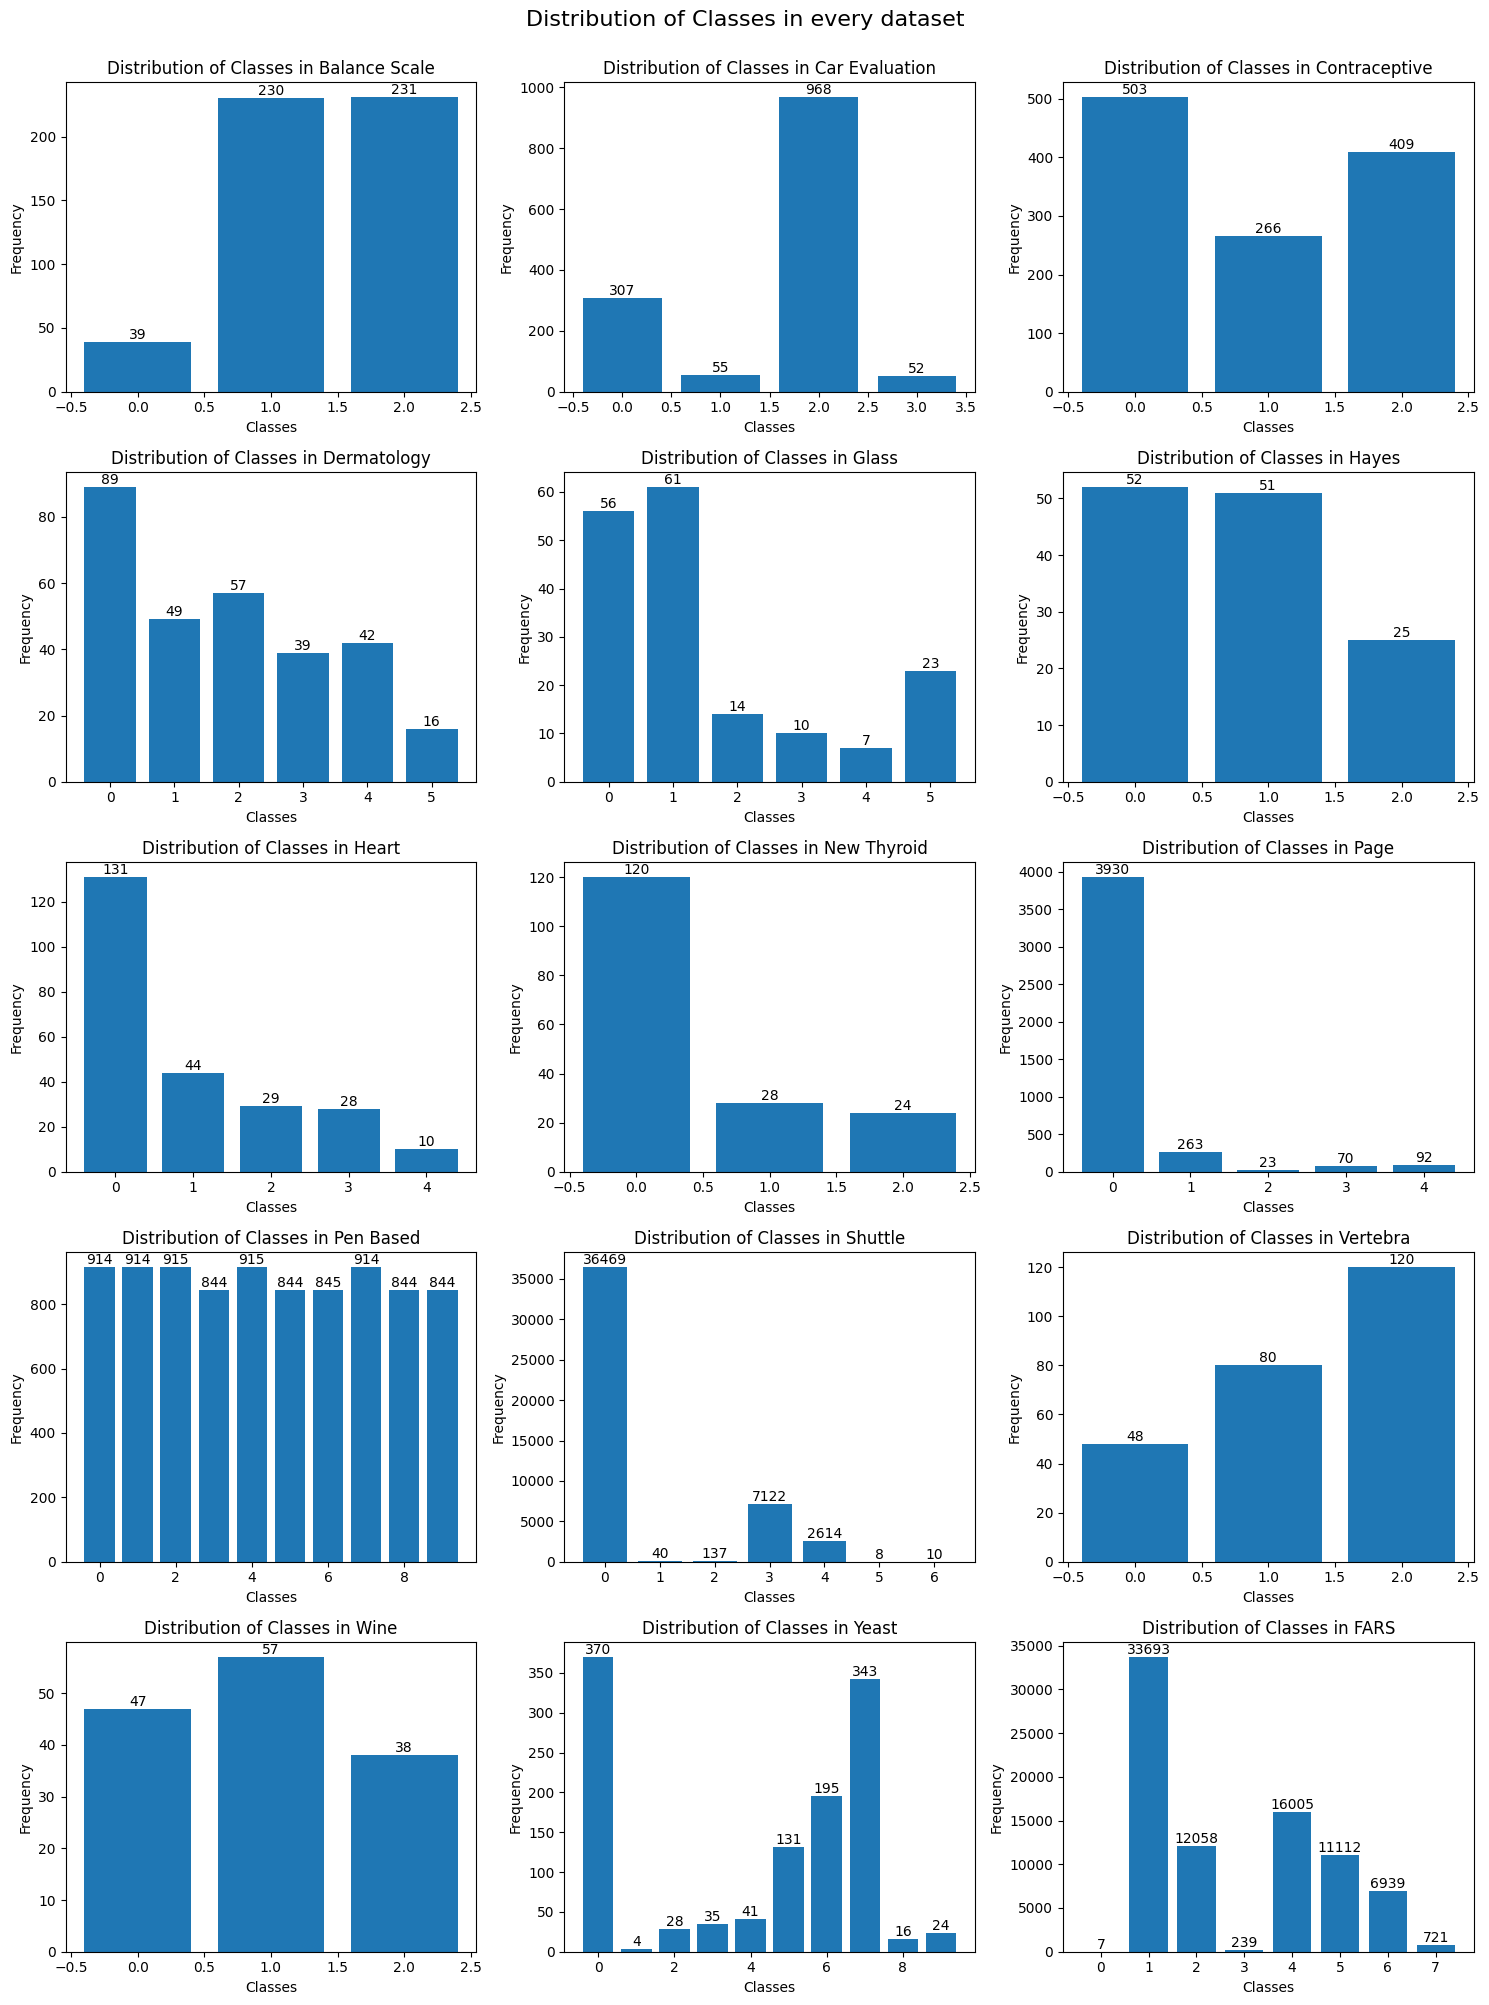

In [31]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    bars = axs[row, col].bar(class_names, class_values)
    for bar, value in zip(bars, class_values):
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
                           ha='center', va='bottom', color='black', fontsize=10)

    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    
fig.suptitle('Distribution of Classes in every dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

# Resampling

### Under sampling using TomekLinks

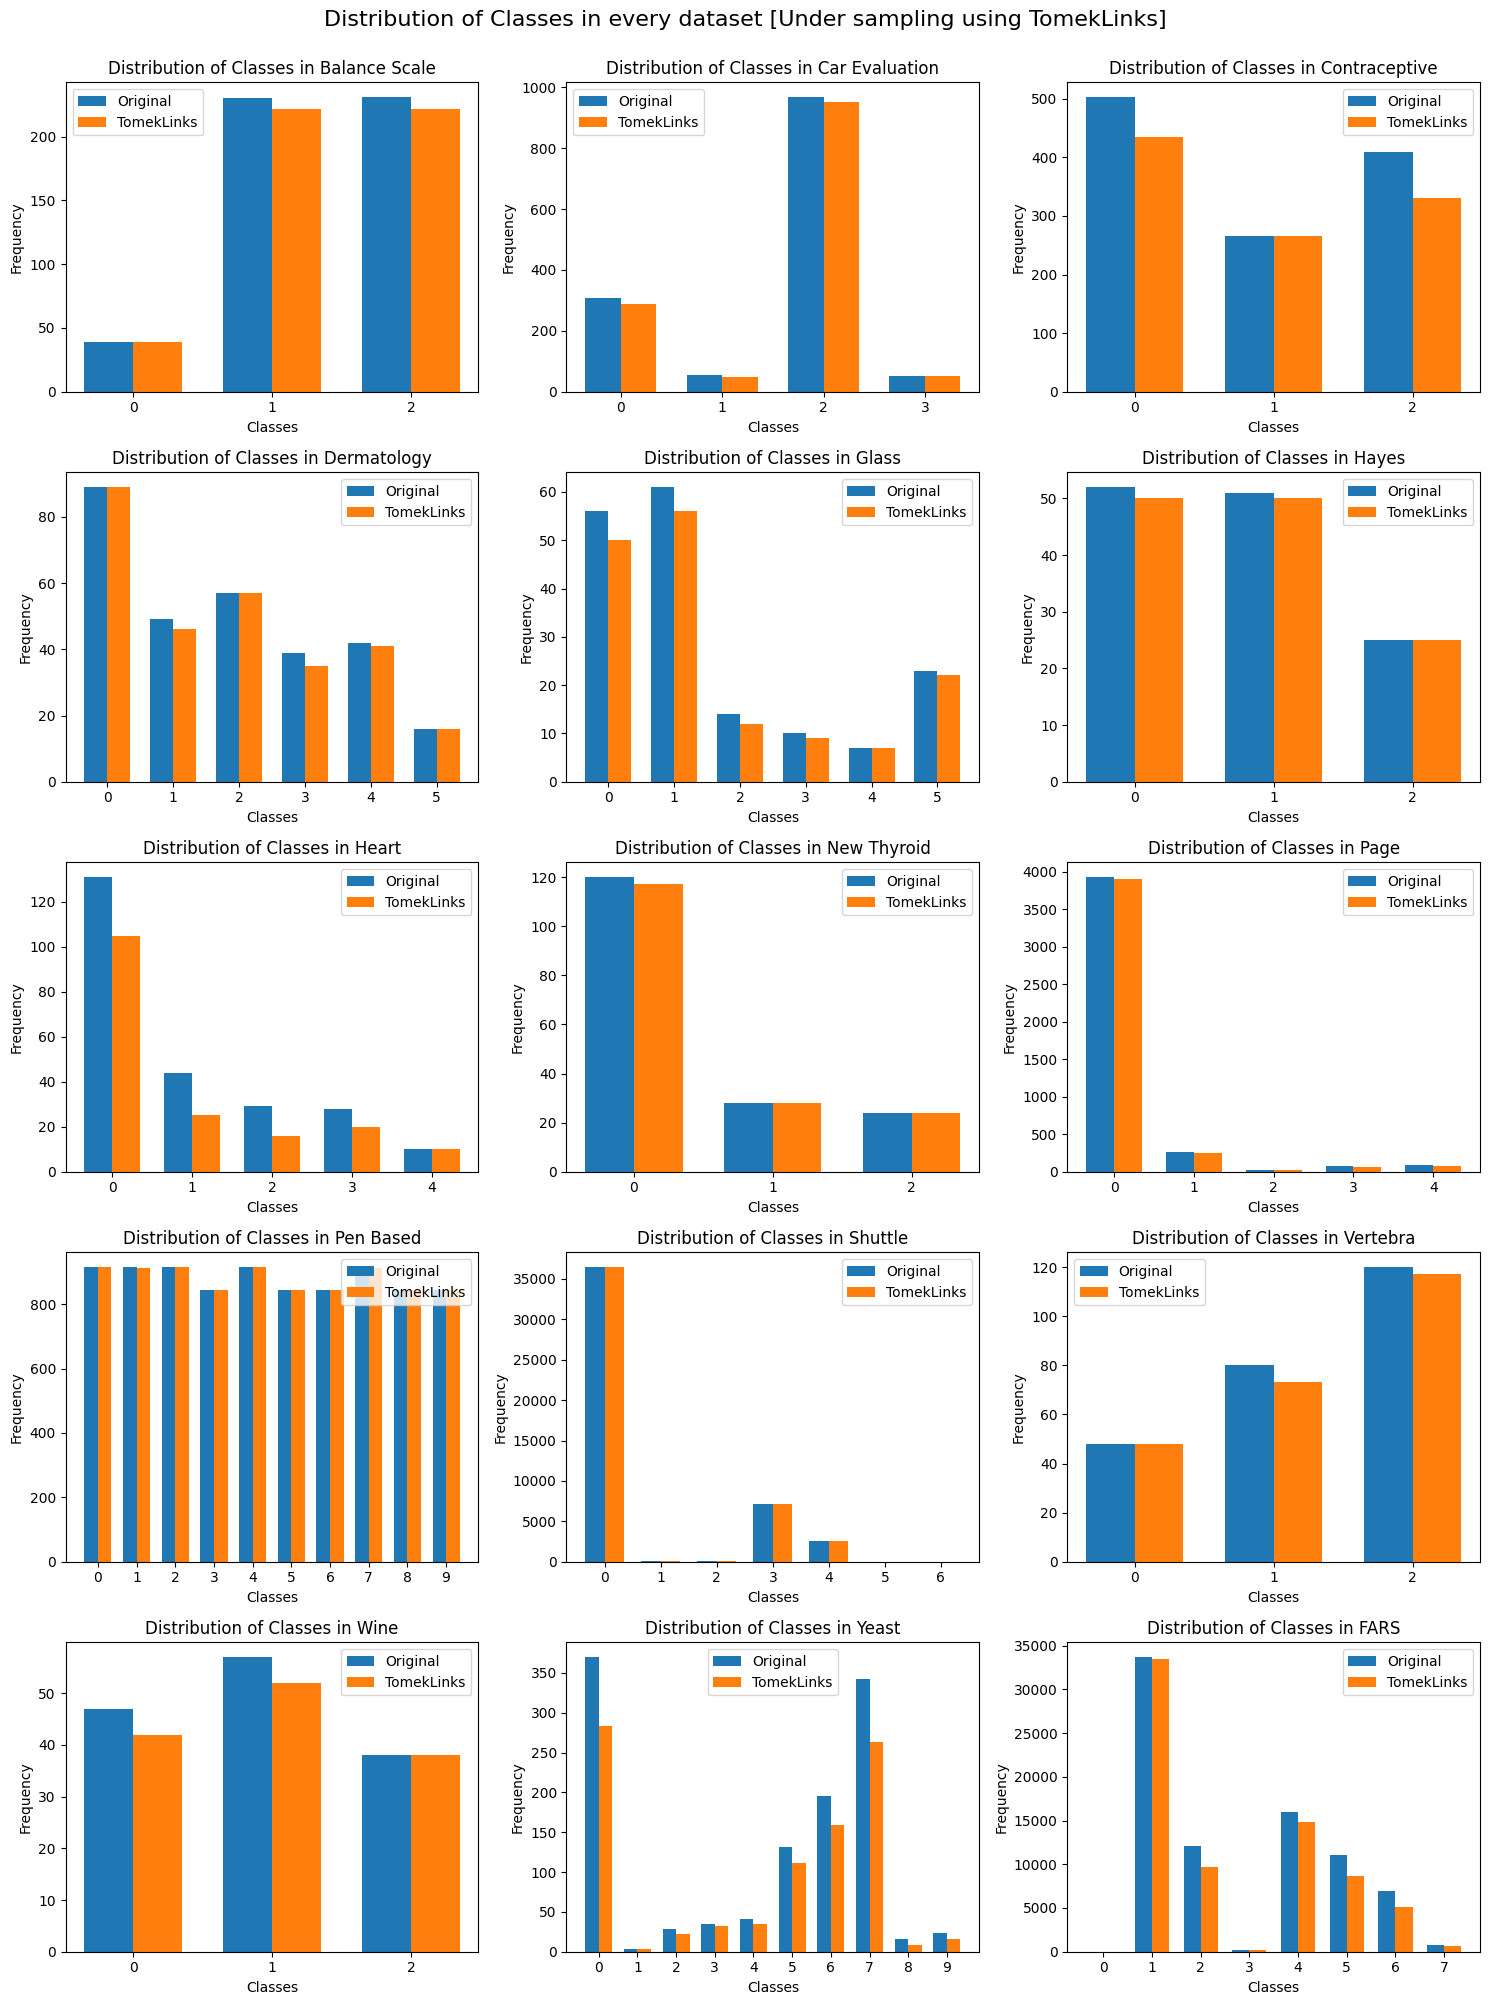

In [40]:
from imblearn.under_sampling import TomekLinks
clf_score_tl_dict = {}

fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    tl = TomekLinks()
    x_tl, y_tl = tl.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_tl.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  # the label locations
    
    width = 0.35  # the width of the bars
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='TomekLinks')

    # for rects in [rects1, rects2]:
    #     for rect in rects:
    #         height = rect.get_height()
    #         axs[row, col].annotate('{}'.format(height),
    #                                 xy=(rect.get_x() + rect.get_width() / 2, height),
    #                                 xytext=(0, 3),  # 3 points vertical offset
    #                                 textcoords="offset points",
    #                                 ha='center', va='bottom')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Under sampling using TomekLinks]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [41]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        tl = TomekLinks()
        x_tl, y_tl = tl.fit_resample(X_train, y_train)
        
        clf.fit(x_tl, y_tl) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_tl_dict[clf_name] = df
    
    #print(clf_score_dict[clf_name])

100%|██████████| 7/7 [06:09<00:00, 52.85s/it]


### Under sampling using RandomUnderSampler

In [32]:
clf_score_rus_dict = {}
from imblearn.under_sampling import RandomUnderSampler

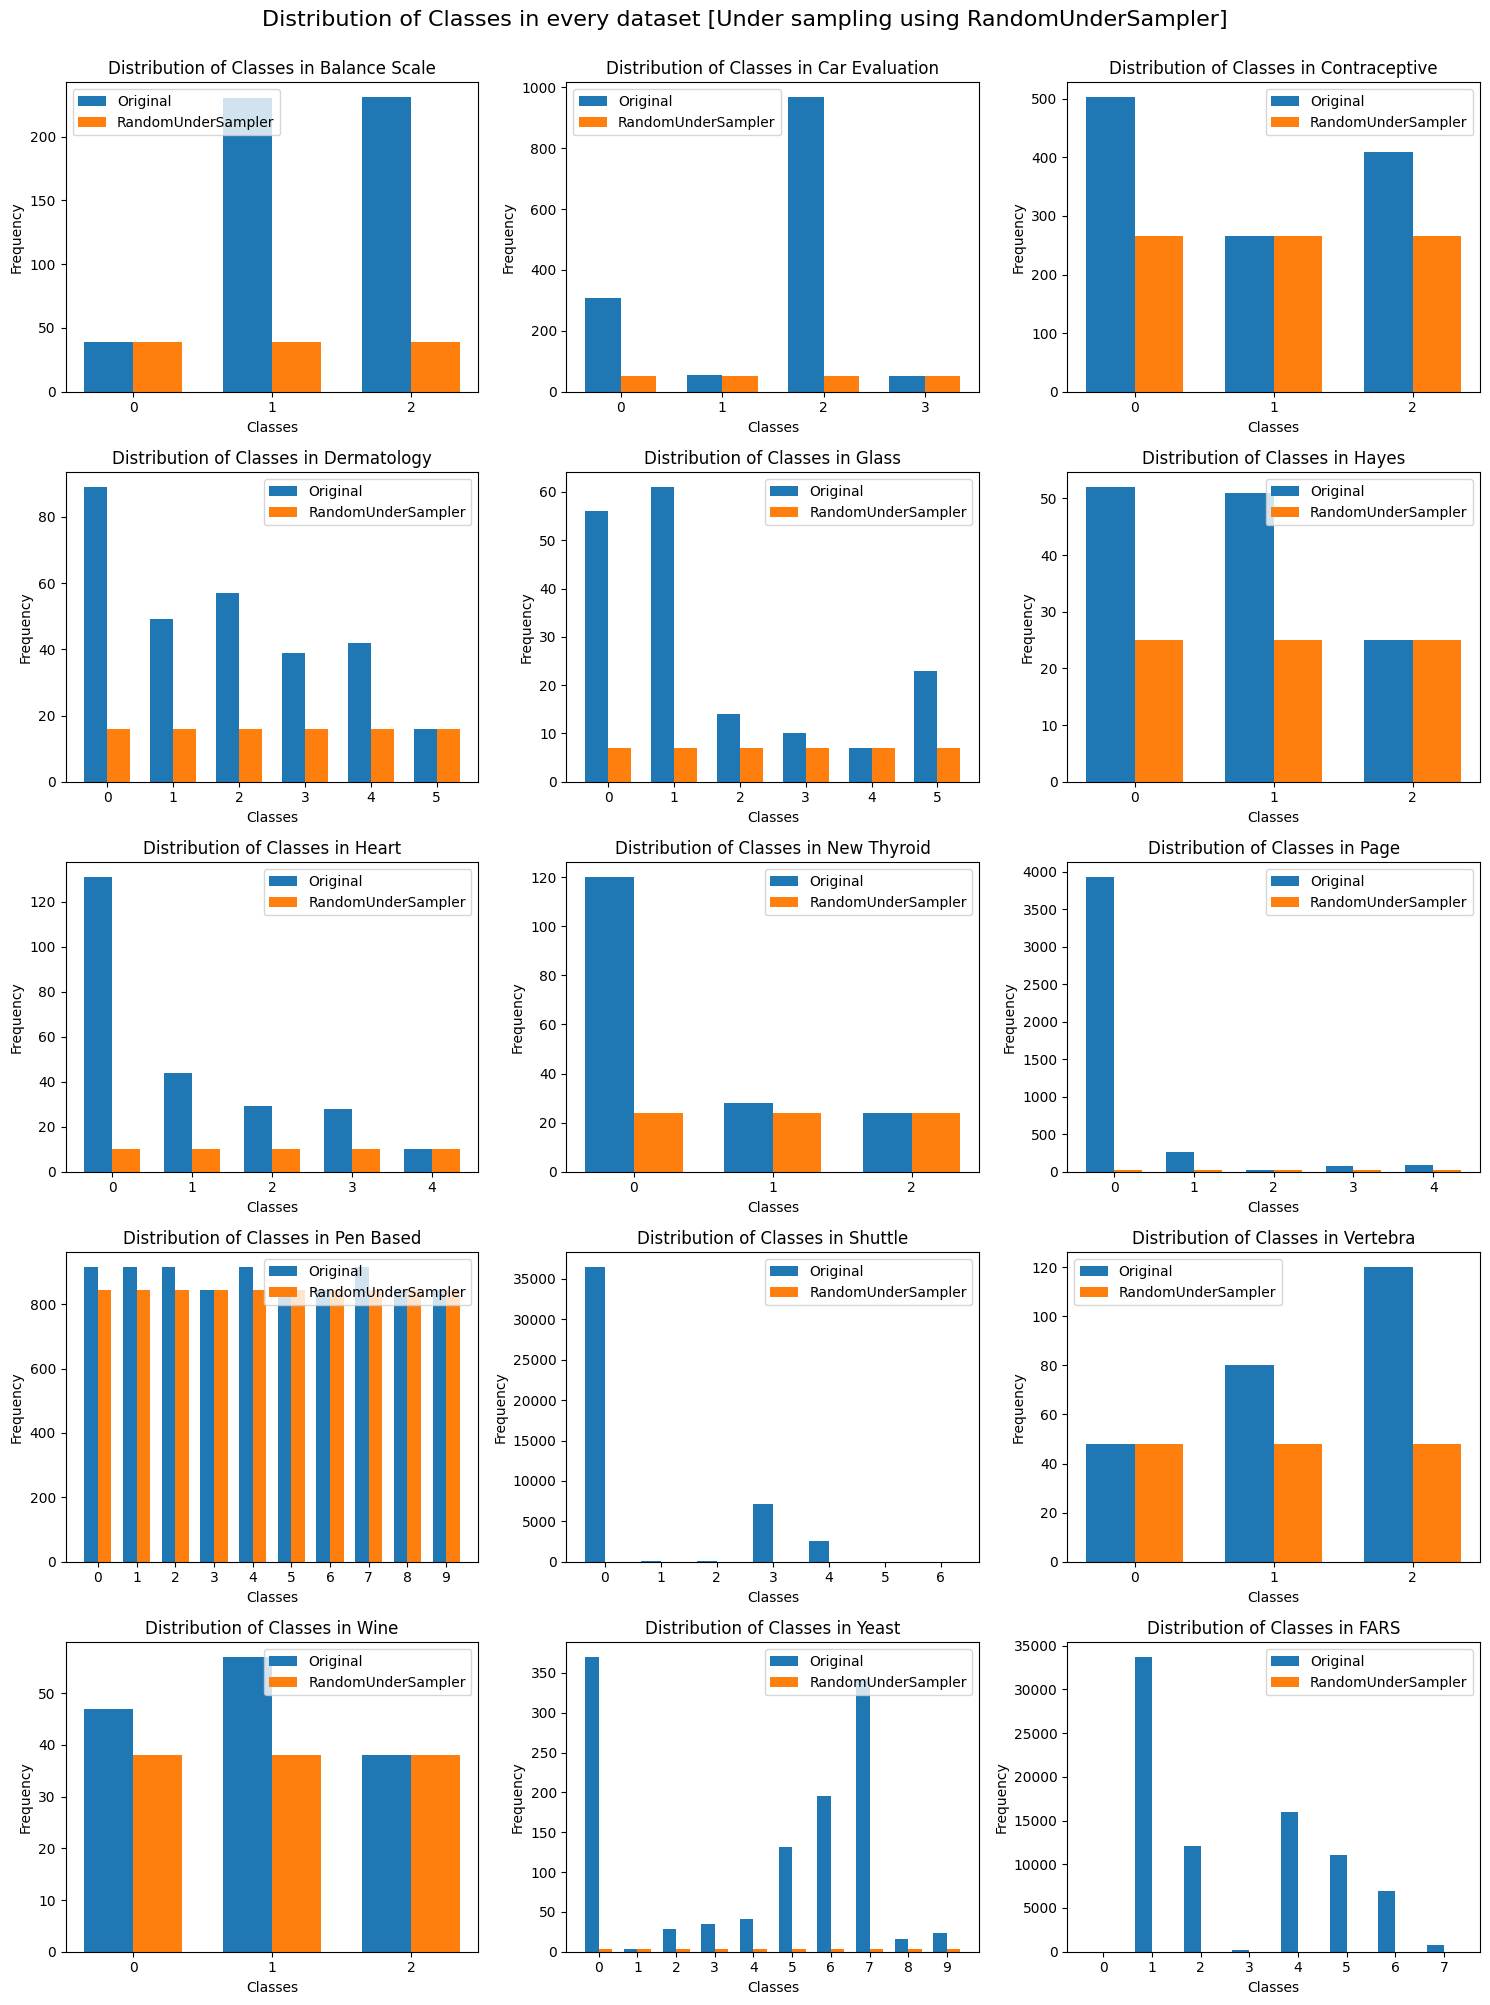

In [33]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    rus = RandomUnderSampler(random_state=42)
    x_rus, y_rus = rus.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_rus.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  
    
    width = 0.35  
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='RandomUnderSampler')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Under sampling using RandomUnderSampler]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [34]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        rus = RandomUnderSampler(random_state=42)
        x_rus, y_rus = rus.fit_resample(X_train, y_train)
        
        clf.fit(x_rus, y_rus) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_rus_dict[clf_name] = df
    

100%|██████████| 7/7 [01:34<00:00, 13.53s/it]


In [35]:
clf_score_rus_dict['AdaBoost']

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.720000,0.937778,0.720000,0.782682,0.685418,0.735528,0.627013,0.644872,0.481246
Car Evaluation,0.658960,0.764734,0.658960,0.680055,0.660395,0.667351,0.432429,0.417227,0.772727
Contraceptive,0.572881,0.609900,0.572881,0.581653,0.484076,0.576060,0.362448,0.364411,0.330992
Dermatology,0.689189,0.531265,0.689189,0.585854,0.720514,0.671055,0.617714,0.648473,0.000000
Glass,0.302326,0.373221,0.302326,0.260615,0.521940,0.307638,0.164945,0.143452,0.000000
Hayes,0.593750,0.390625,0.593750,0.458333,0.833333,0.566949,0.465787,0.519615,0.000000
Heart,0.508197,0.617573,0.508197,0.538544,0.397180,0.516513,0.340663,0.333440,0.037106
New Thyroid,0.790698,0.856530,0.790698,0.808034,0.874329,0.796261,0.667995,0.626487,0.714286
Page,0.915068,0.912389,0.915068,0.911353,0.610737,0.914824,0.537835,0.584762,0.000000
Pen Based,0.384266,0.401627,0.384266,0.322337,0.245357,0.385782,0.325793,0.332605,0.000000


## Under sampling using ClusterCentroids

In [42]:
clf_score_cc_dict = {}
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

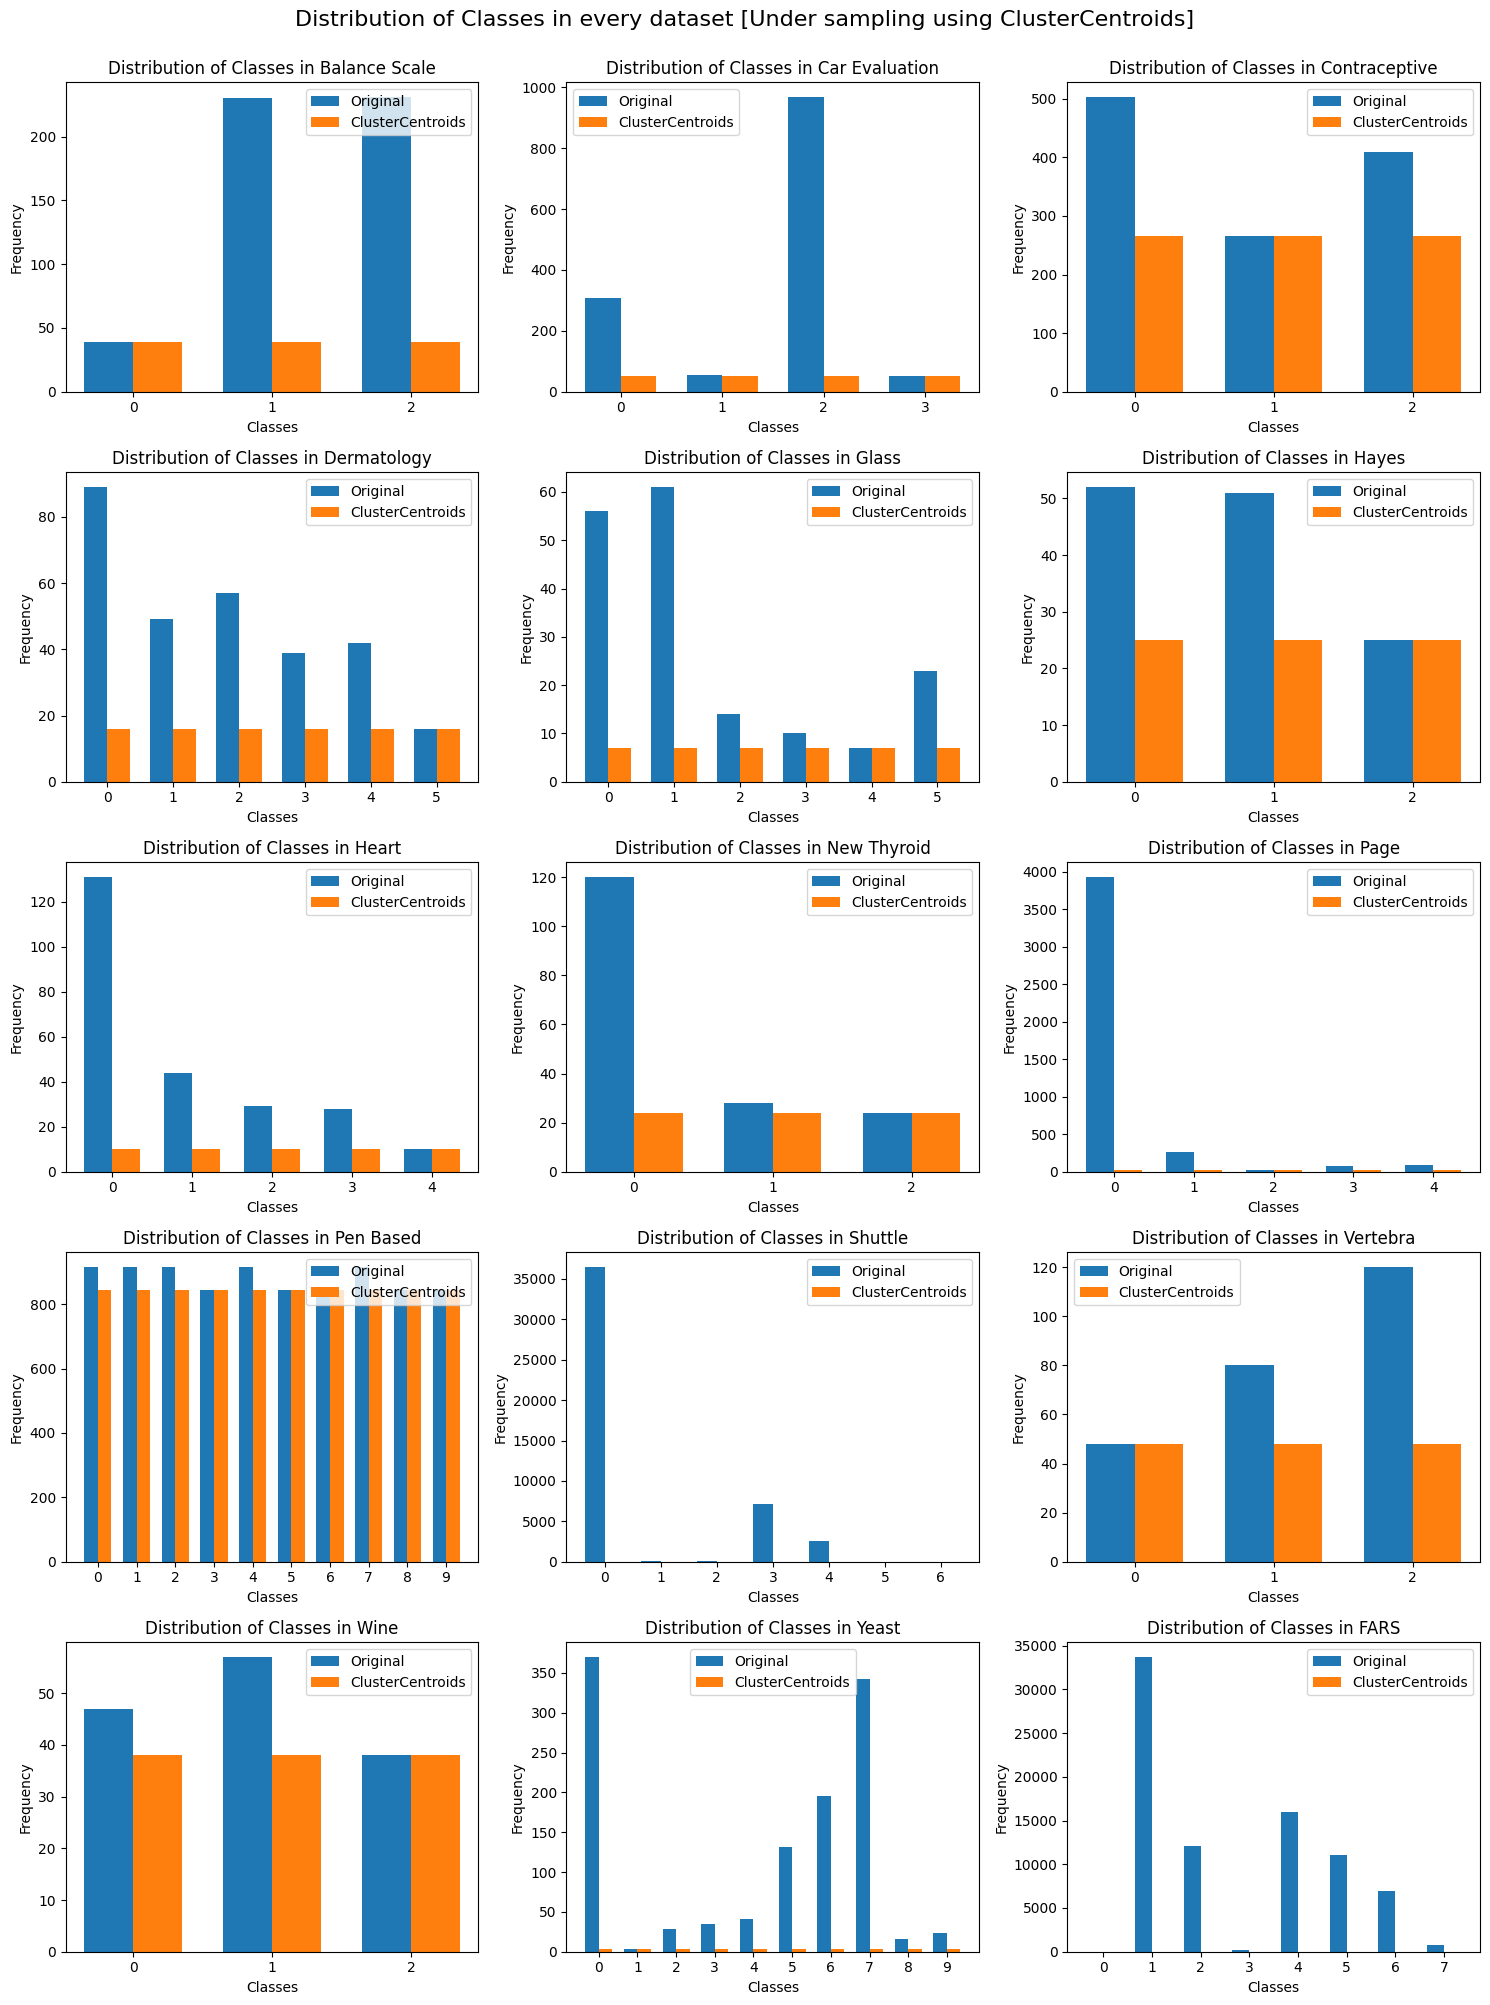

In [43]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    cc = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
    x_cc, y_cc = cc.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_cc.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  
    
    width = 0.35  
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='ClusterCentroids')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Under sampling using ClusterCentroids]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [48]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        cc = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
        x_cc, y_cc = cc.fit_resample(X_train, y_train)
        
        clf.fit(x_cc, y_cc) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_cc_dict[clf_name] = df
    

100%|██████████| 7/7 [01:59<00:00, 17.11s/it]


In [50]:
clf_score_cc_dict["AdaBoost_SAMME"]

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.584000,0.917939,0.584000,0.674811,0.679032,0.603975,0.498636,0.509325,0.309740
Car Evaluation,0.297688,0.616786,0.297688,0.342831,0.430496,0.312380,0.120948,0.094249,0.185950
Contraceptive,0.491525,0.566700,0.491525,0.497457,0.537296,0.497525,0.278177,0.281370,0.224759
Dermatology,0.621622,0.512812,0.621622,0.540112,0.703135,0.609858,0.569946,0.603706,0.000000
Glass,0.279070,0.145349,0.279070,0.187087,0.421181,0.257531,0.094529,0.085770,0.000000
Hayes,0.593750,0.390625,0.593750,0.458333,0.833333,0.566949,0.465787,0.519615,1.000000
Heart,0.295082,0.492507,0.295082,0.327073,0.372977,0.306242,0.114450,0.109112,0.003092
New Thyroid,0.790698,0.862076,0.790698,0.805677,0.757153,0.796694,0.683444,0.654867,0.857143
Page,0.805479,0.946957,0.805479,0.859215,0.784015,0.816570,0.510839,0.463910,0.510174
Pen Based,0.720327,0.719939,0.720327,0.706086,0.717181,0.720292,0.690422,0.692661,0.016348


### Under sampling using InstanceHardnessThreshold

In [51]:
clf_score_iht_dict = {}
from imblearn.under_sampling import InstanceHardnessThreshold

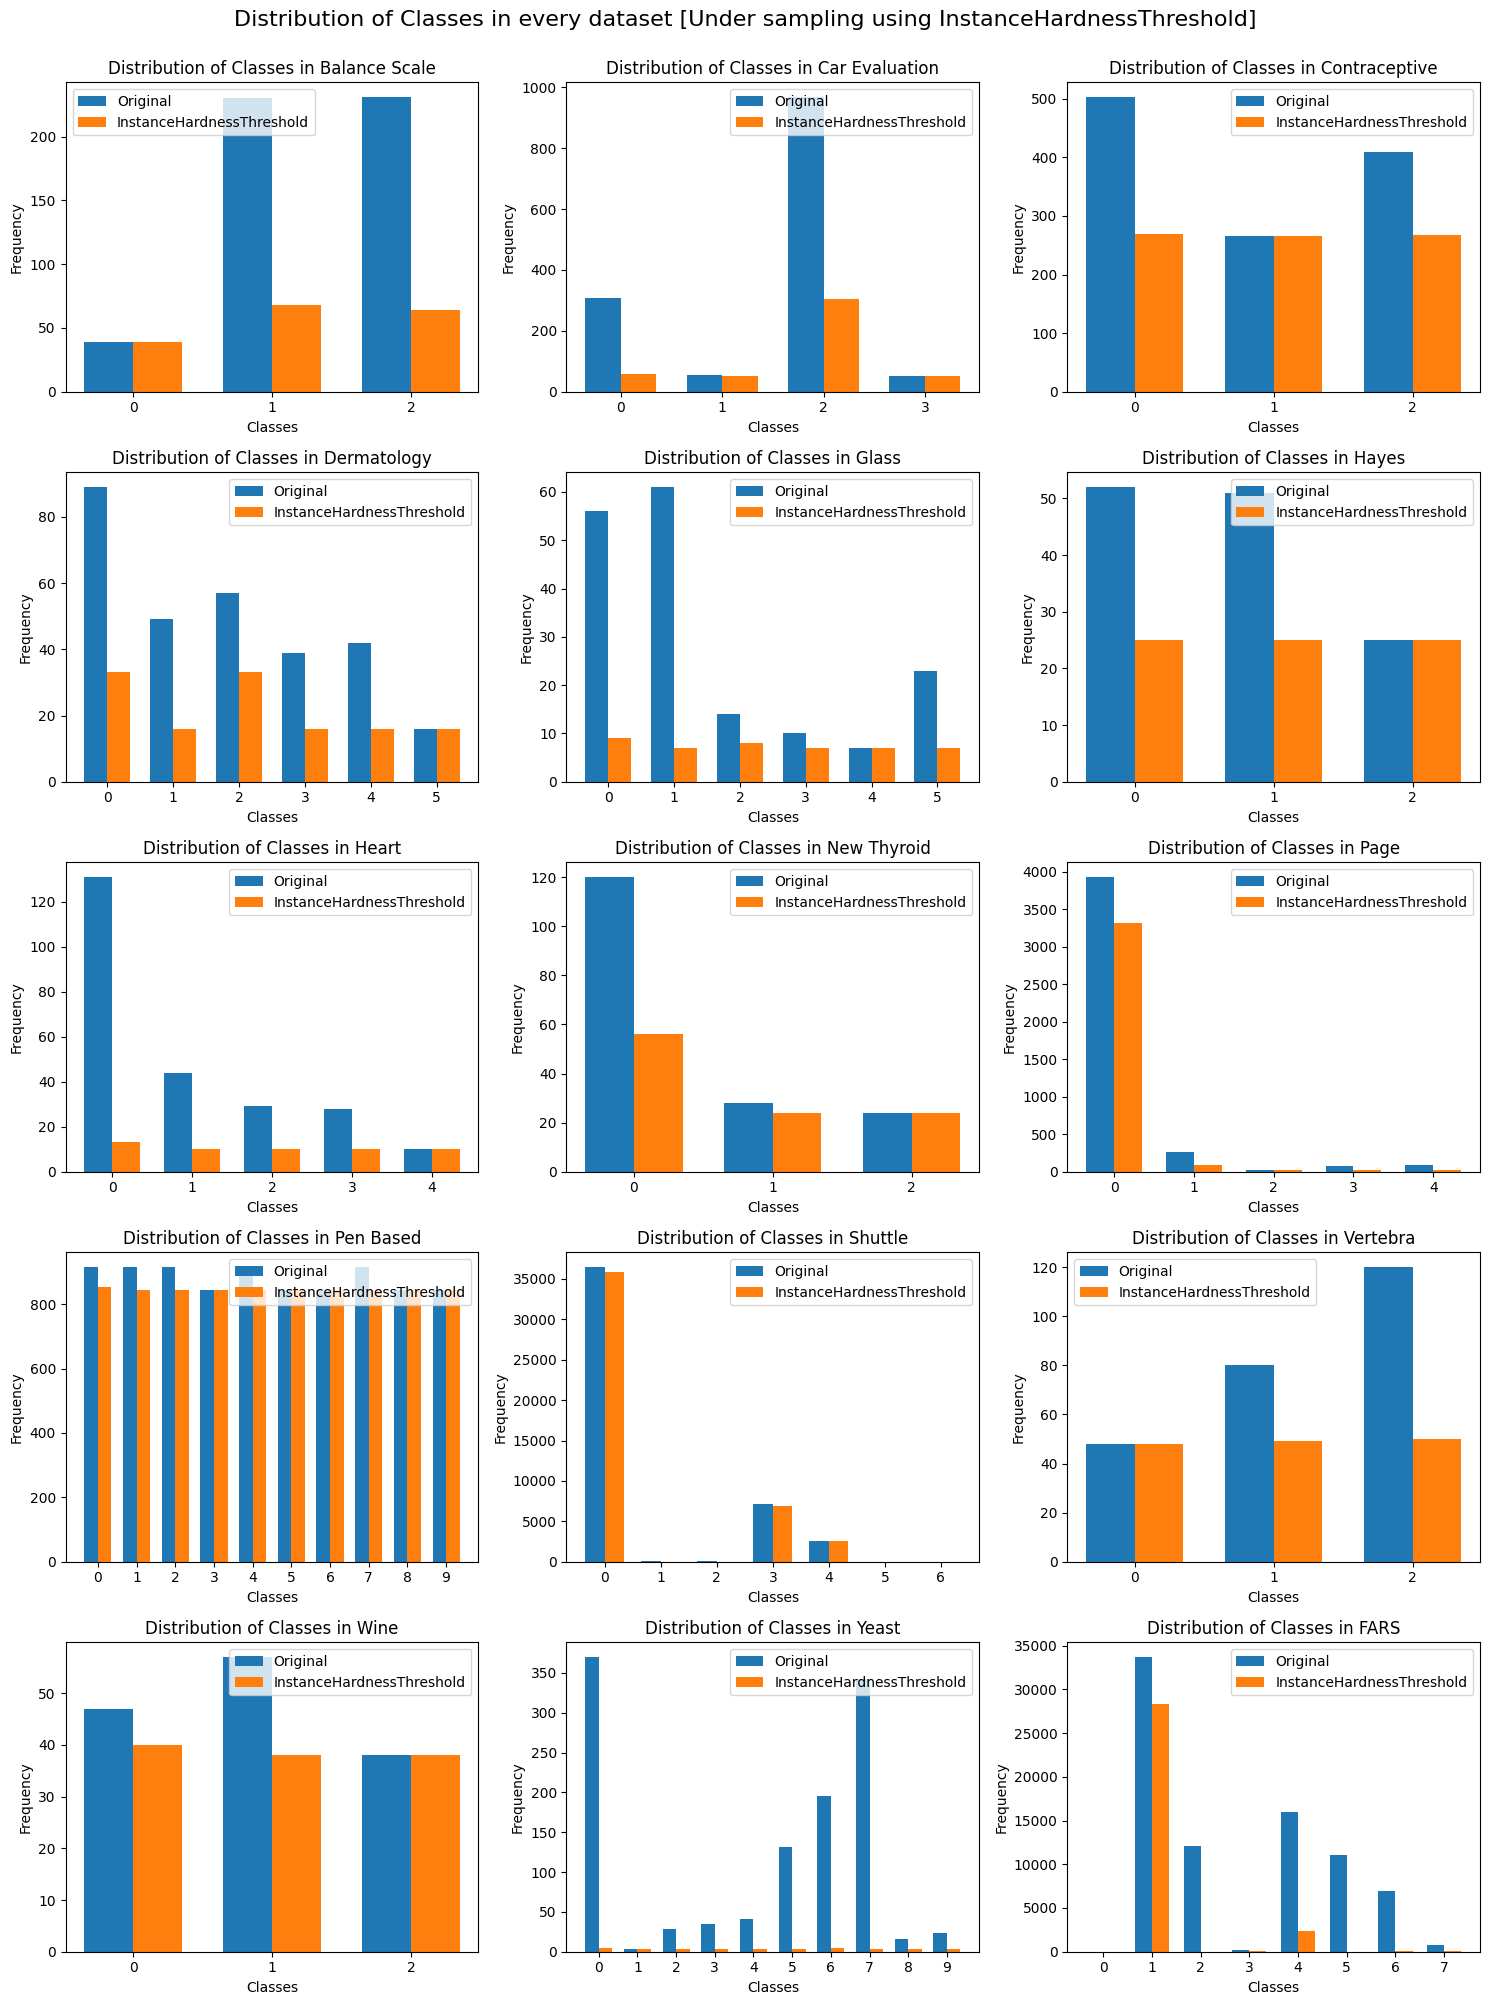

In [52]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    iht = InstanceHardnessThreshold(random_state=42)
    x_iht, y_iht = iht.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_iht.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  
    
    width = 0.35  
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='InstanceHardnessThreshold')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Under sampling using InstanceHardnessThreshold]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [53]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        iht = InstanceHardnessThreshold(random_state=42)
        x_iht, y_iht = iht.fit_resample(X_train, y_train)
        
        clf.fit(x_iht, y_iht) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_iht_dict[clf_name] = df
    

100%|██████████| 7/7 [08:40<00:00, 74.34s/it]


In [54]:
clf_score_iht_dict['AdaBoost_SAMME']

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.360000,0.928889,0.360000,0.445303,0.646092,0.381225,0.352687,0.345542,0.092559
Car Evaluation,0.739884,0.833242,0.739884,0.767868,0.534436,0.747498,0.561314,0.550380,0.660839
Contraceptive,0.586441,0.629370,0.586441,0.596317,0.586538,0.590100,0.384021,0.386259,0.348112
Dermatology,0.675676,0.674584,0.675676,0.646085,0.714373,0.675576,0.625810,0.652468,0.000000
Glass,0.372093,0.165116,0.372093,0.224806,0.474524,0.334028,0.177237,0.233977,0.000000
Hayes,0.562500,0.517210,0.562500,0.486545,0.669483,0.558058,0.395547,0.373498,0.076923
Heart,0.442623,0.548739,0.442623,0.484740,0.297728,0.450544,0.199739,0.205403,0.000000
New Thyroid,0.860465,0.909741,0.860465,0.871687,0.998043,0.864723,0.770195,0.750329,0.857143
Page,0.953425,0.953987,0.953425,0.952062,0.737917,0.953476,0.746835,0.741029,0.293076
Pen Based,0.624375,0.667386,0.624375,0.617979,0.668305,0.628054,0.593794,0.591311,0.004613


### Over sampling using RandomOverSampler

In [55]:
clf_score_ros_dict = {}
from imblearn.over_sampling import RandomOverSampler

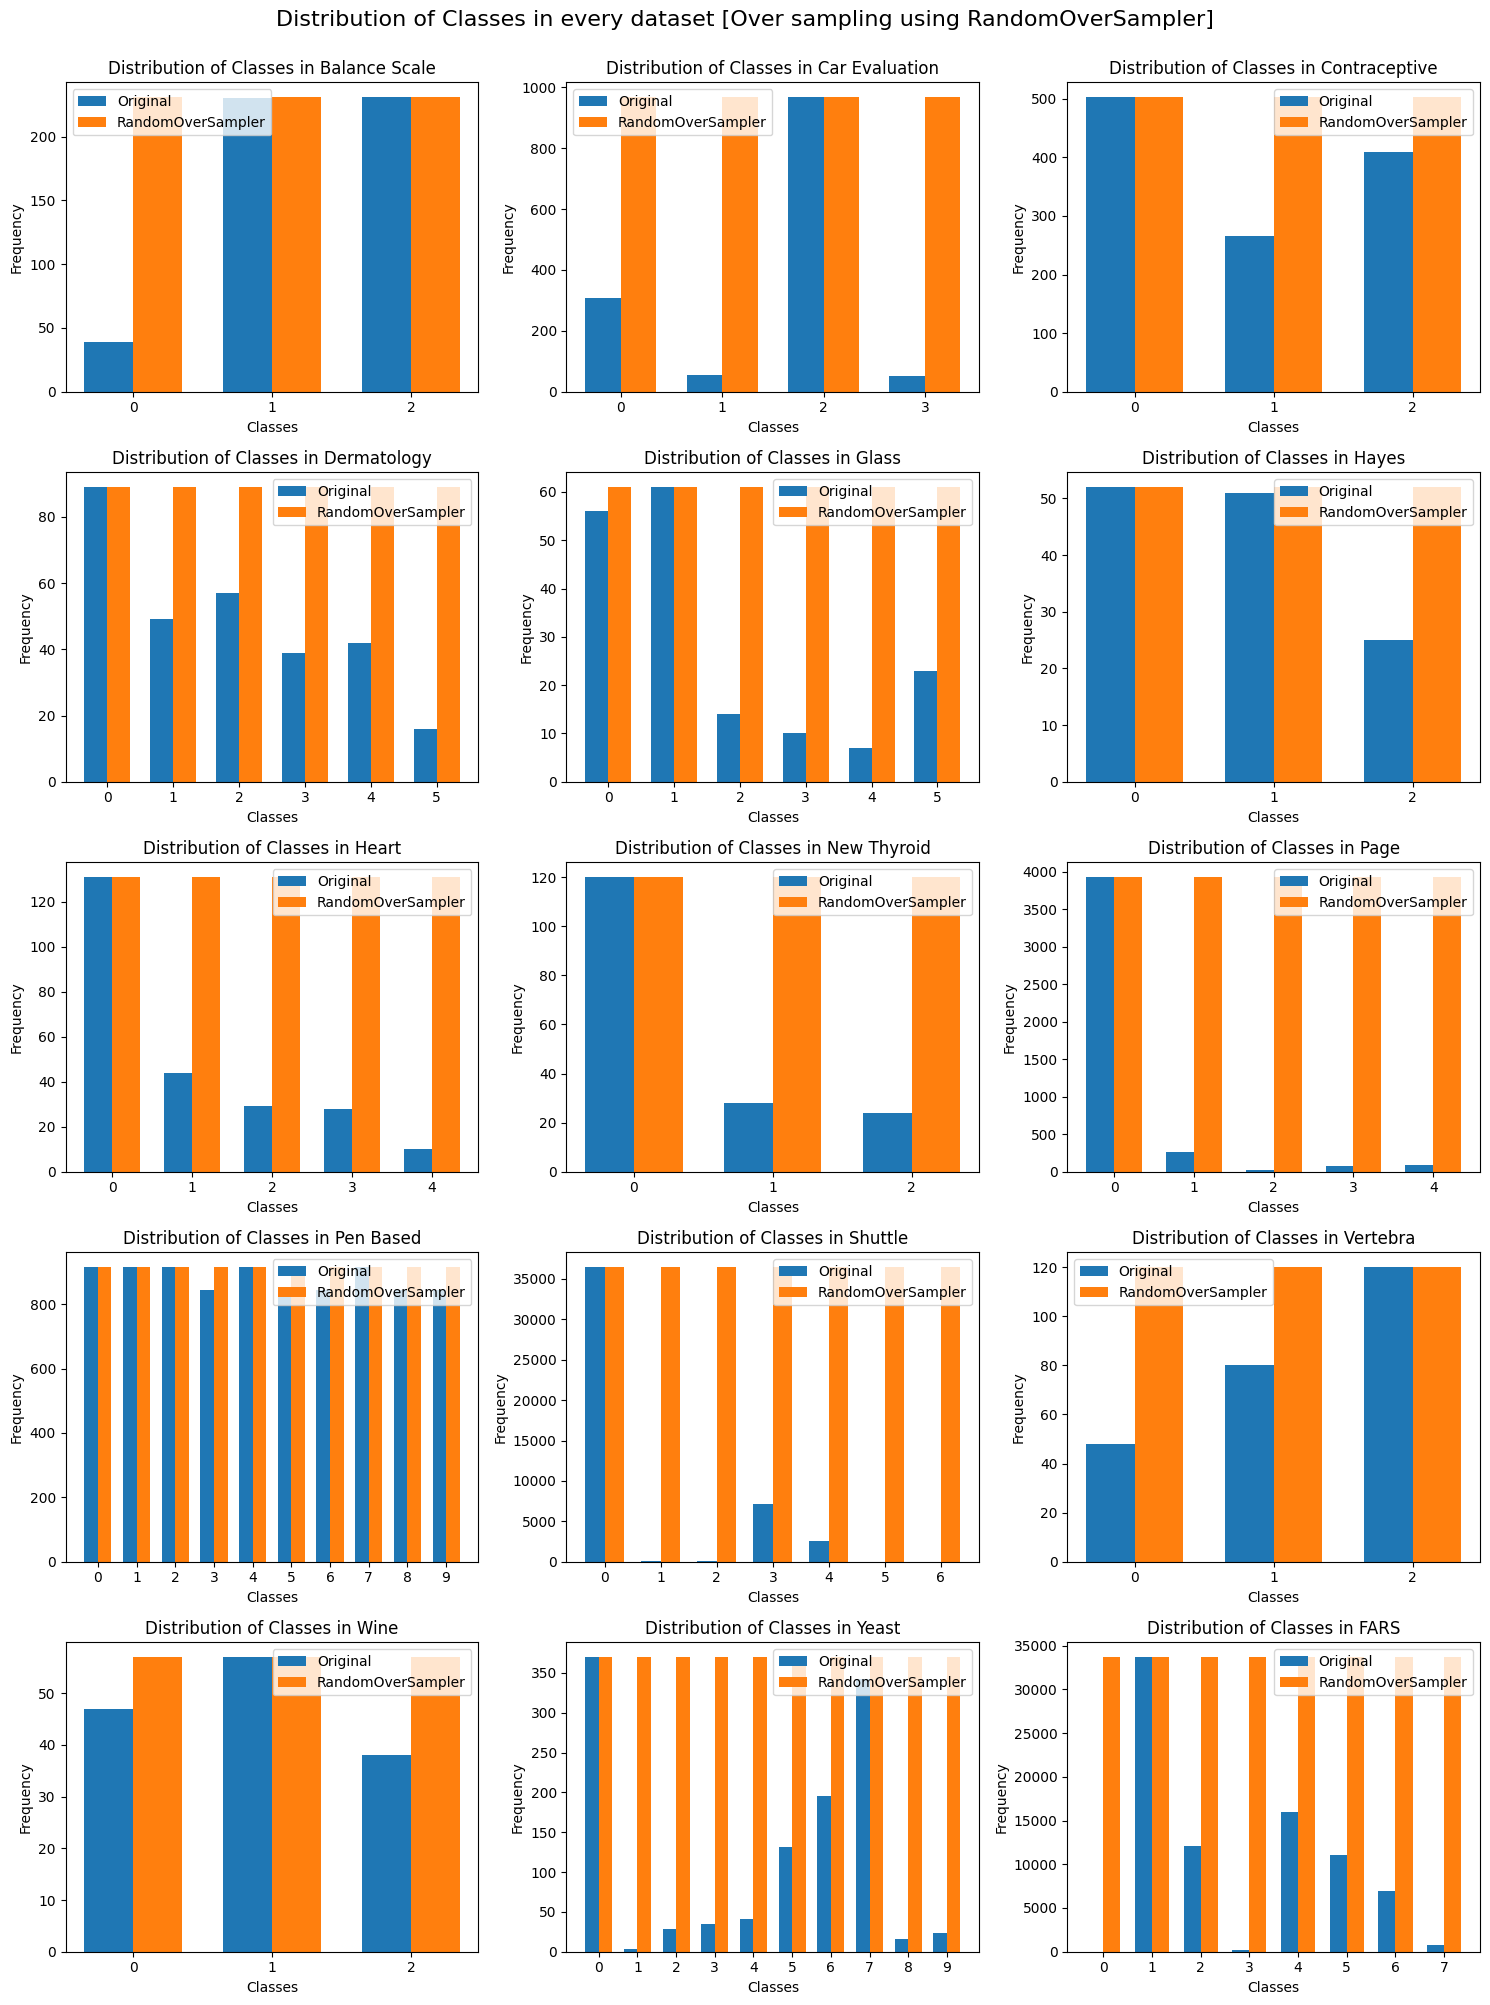

In [56]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    ros = RandomOverSampler(random_state=42)
    x_ros, y_ros = ros.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_ros.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  
    
    width = 0.35  
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='RandomOverSampler')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Over sampling using RandomOverSampler]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [57]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        ros = RandomOverSampler(random_state=42)
        x_ros, y_ros = ros.fit_resample(X_train, y_train)
        
        clf.fit(x_ros, y_ros) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_ros_dict[clf_name] = df
    

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [12:04<00:00, 103.57s/it]


In [58]:
clf_score_ros_dict['AdaBoost_SAMME']

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.656000,0.921229,0.656000,0.733938,0.681085,0.673631,0.555066,0.573043,0.402299
Car Evaluation,0.835260,0.881255,0.835260,0.847515,0.556592,0.839242,0.685475,0.700268,0.547634
Contraceptive,0.600000,0.623367,0.600000,0.607050,0.578816,0.602052,0.393116,0.397645,0.325285
Dermatology,0.364865,0.146847,0.364865,0.203453,0.779000,0.321476,0.172911,0.225377,0.000000
Glass,0.465116,0.476744,0.465116,0.465116,0.453406,0.466150,0.293610,0.299145,0.000000
Hayes,0.593750,0.390625,0.593750,0.458333,0.833333,0.566949,0.465787,0.519615,1.000000
Heart,0.524590,0.602080,0.524590,0.542344,0.415834,0.530801,0.313367,0.308494,0.000000
New Thyroid,0.976744,0.977494,0.976744,0.976040,0.978892,0.976812,0.952790,0.950388,0.857143
Page,0.919635,0.926669,0.919635,0.919295,0.707295,0.920270,0.612389,0.585731,0.184409
Pen Based,0.769441,0.774076,0.769441,0.770531,0.723428,0.769860,0.744250,0.744039,0.080395


### Over sampling using SMOTE

In [59]:
clf_score_sm_dict = {}
from imblearn.over_sampling import SMOTE

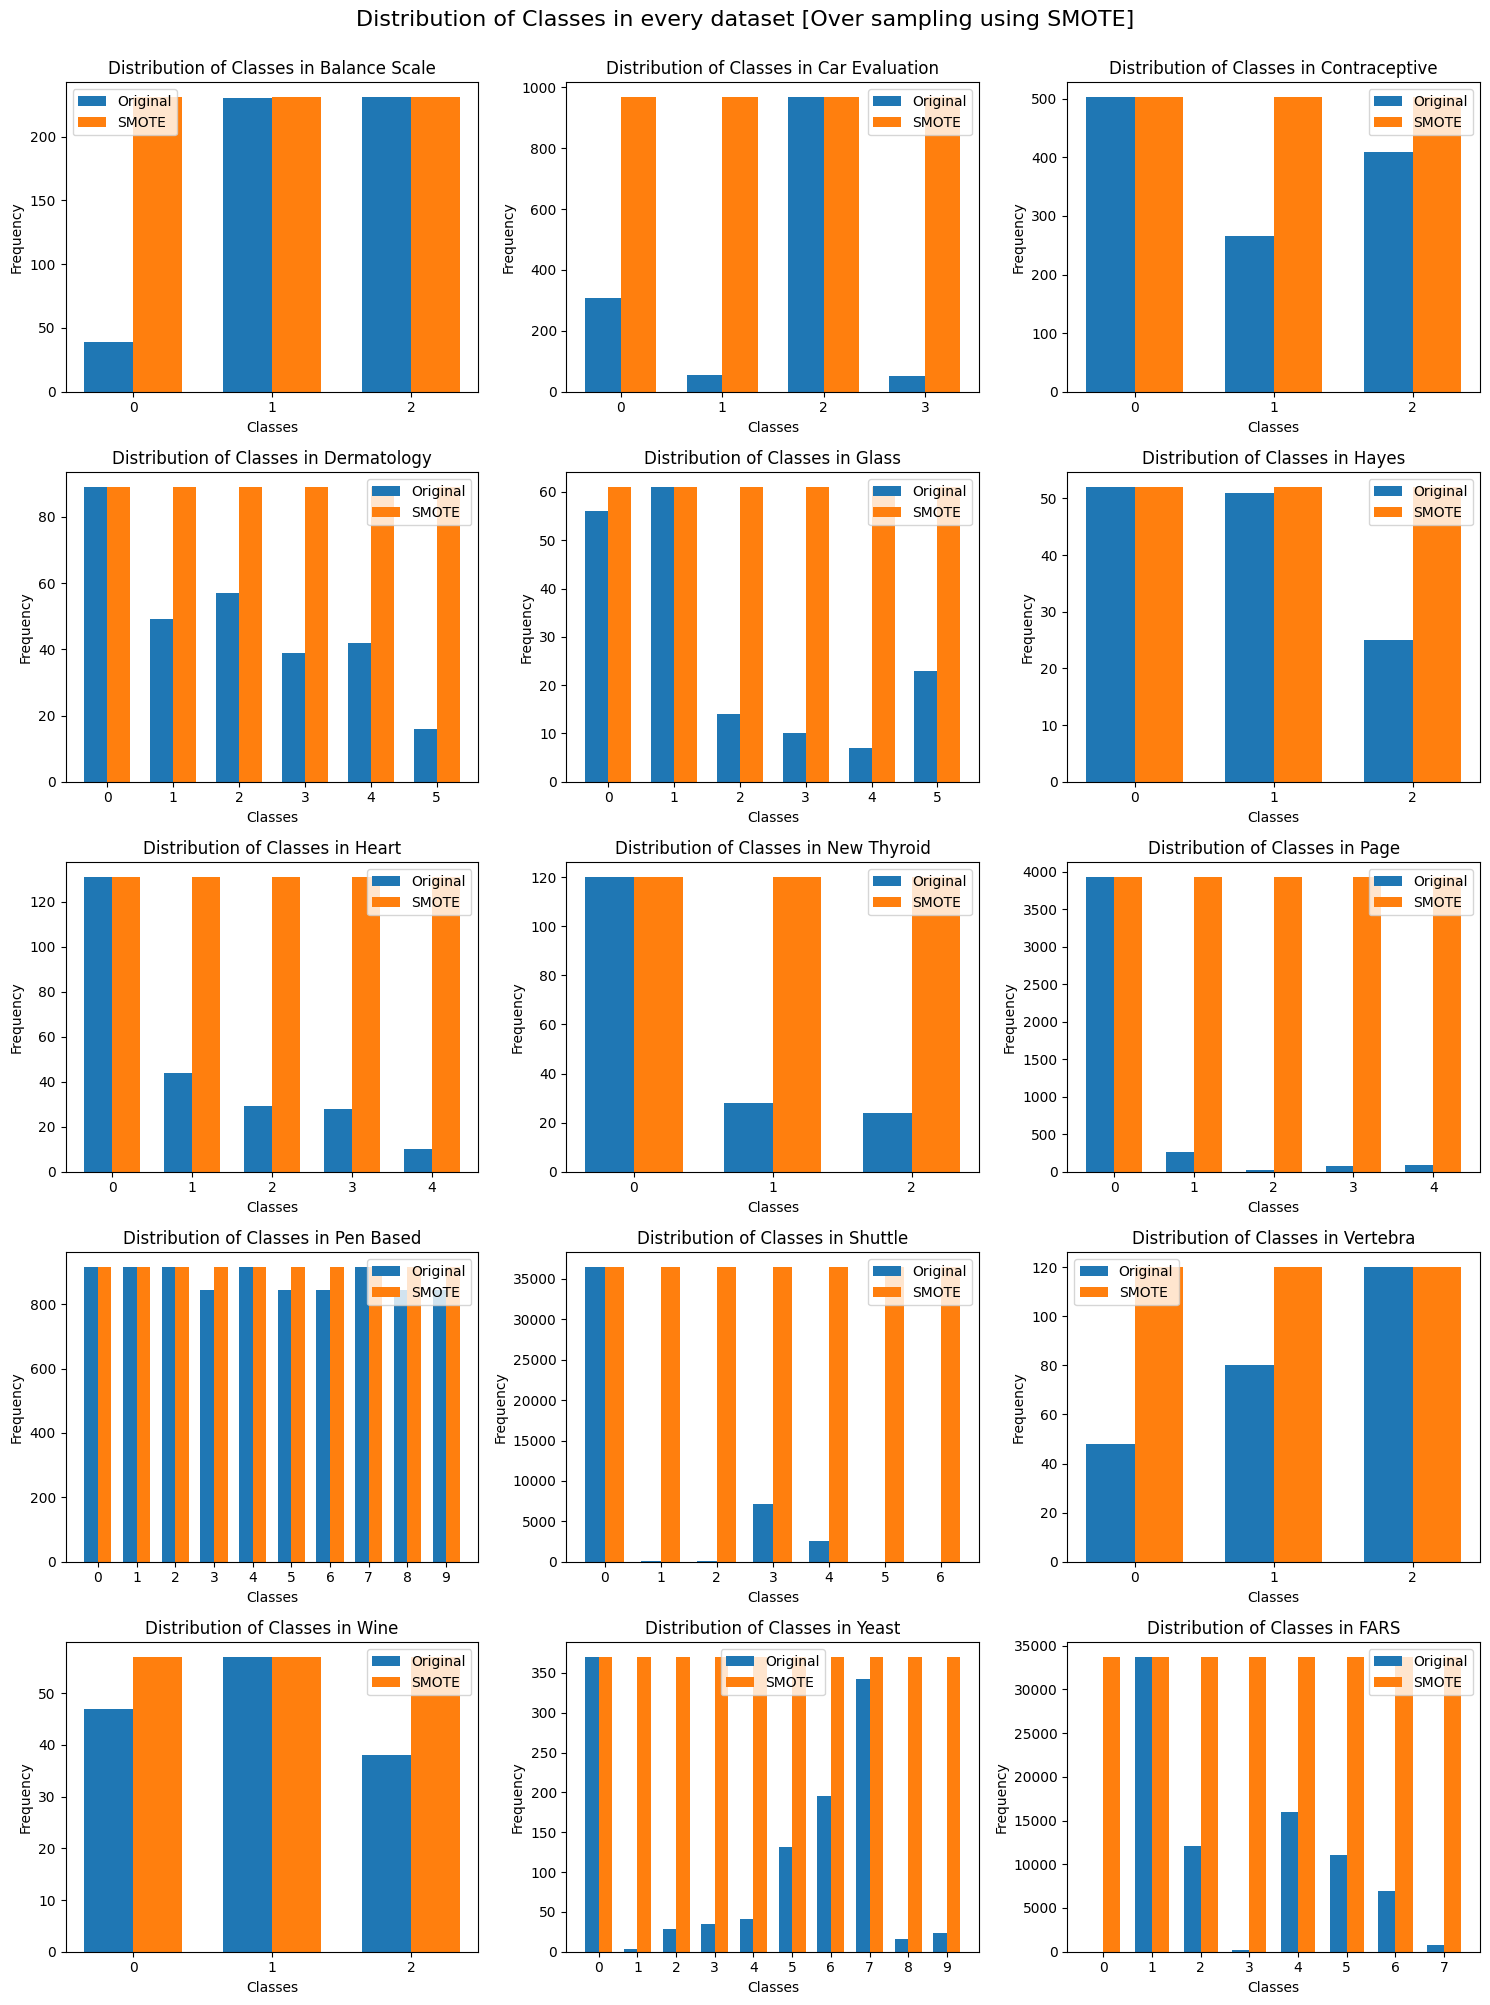

In [60]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20), constrained_layout=True)
for i, (X, y) in enumerate(zip(X_list, y_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    sm = SMOTE(sampling_strategy='auto',k_neighbors=3,random_state=42)
    x_sm, y_sm = sm.fit_resample(X_train, y_train)
    row = i // 3
    col = i % 3
    counts = y_train.iloc[:,0].value_counts().sort_index()
    class_names = counts.index.tolist()
    class_values = counts.values.tolist()
    
    counts_re = y_sm.iloc[:,0].value_counts().sort_index()
    class_values_re = counts_re.values.tolist()
    
    x = np.arange(len(class_names))  
    
    width = 0.35  
    
    rects1 = axs[row, col].bar(x - width/2, class_values, width, label='Original')
    rects2 = axs[row, col].bar(x + width/2, class_values_re, width, label='SMOTE')
    
    axs[row, col].set_xlabel('Classes')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Classes in {name_list[i]}')
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(class_names)
    axs[row, col].legend()
    
fig.suptitle('Distribution of Classes in every dataset [Over sampling using SMOTE]', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

In [61]:
for clf_name, clf in tqdm(clf_dict.items()):
    score = {}
    
    for i, (X, y) in enumerate(zip(X_list, y_list)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        #sampling
        sm = SMOTE(sampling_strategy='auto',k_neighbors=3,random_state=42)
        x_sm, y_sm = sm.fit_resample(X_train, y_train)
        
        clf.fit(x_sm, y_sm) 
        
        y_preds = clf.predict(X_test) 
        y_scores = clf.predict_proba(X_test)

        score_p = metric_list(y_test,y_preds,y_scores, len(y.iloc[:,0].unique()))
        score[name_list[i]]= score_p
    
    df = pd.DataFrame.from_dict(score, orient='index', columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])
    clf_score_sm_dict[clf_name] = df
    

100%|██████████| 7/7 [14:15<00:00, 122.17s/it]


In [62]:
clf_score_sm_dict['AdaBoost_SAMME']

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.648000,0.896326,0.648000,0.728252,0.676719,0.664742,0.511258,0.543360,0.413793
Car Evaluation,0.867052,0.900292,0.867052,0.875879,0.661897,0.869972,0.749007,0.750436,0.600763
Contraceptive,0.559322,0.592691,0.559322,0.566133,0.569930,0.562200,0.340852,0.341520,0.324846
Dermatology,0.364865,0.146847,0.364865,0.203453,0.779000,0.321476,0.172911,0.225377,0.000000
Glass,0.418605,0.479070,0.418605,0.421267,0.519983,0.423463,0.288202,0.272396,0.009259
Hayes,0.593750,0.390625,0.593750,0.458333,0.833333,0.566949,0.465787,0.519615,1.000000
Heart,0.524590,0.533008,0.524590,0.523877,0.327291,0.525344,0.301111,0.296446,0.000000
New Thyroid,0.976744,0.977494,0.976744,0.976040,0.997155,0.976812,0.952790,0.950388,0.857143
Page,0.915982,0.937445,0.915982,0.924080,0.704411,0.917892,0.634346,0.636798,0.202372
Pen Based,0.717599,0.705889,0.717599,0.695673,0.710327,0.716518,0.685881,0.689902,0.015243


In [65]:
file_name_list = []

def save_result(result,method_name,file_name_list):
    for clf, score in result.items():
        score.to_csv(f'result/resampled/{method_name}_{clf}.csv', index=True)
        file_name_list.append(f'{method_name}_{clf}.csv')

save_result(clf_score_tl_dict,'TomekLinks',file_name_list)
save_result(clf_score_rus_dict,'RandomUnderSampler',file_name_list)
save_result(clf_score_cc_dict,'ClusterCentroids',file_name_list)
save_result(clf_score_iht_dict,'InstanceHardnessThreshold',file_name_list)
save_result(clf_score_ros_dict,'RandomOverSampler',file_name_list)
save_result(clf_score_sm_dict,'SMOTE',file_name_list)

file_name_list

['TomekLinks_AdaBoost.csv',
 'TomekLinks_AdaBoost_SAMME.csv',
 'TomekLinks_GradientBoosting.csv',
 'TomekLinks_XGBoost.csv',
 'TomekLinks_CatBoost.csv',
 'TomekLinks_RUSBoostClassifier.csv',
 'TomekLinks_AdaCost.csv',
 'RandomUnderSampler_AdaBoost.csv',
 'RandomUnderSampler_AdaBoost_SAMME.csv',
 'RandomUnderSampler_GradientBoosting.csv',
 'RandomUnderSampler_XGBoost.csv',
 'RandomUnderSampler_CatBoost.csv',
 'RandomUnderSampler_RUSBoostClassifier.csv',
 'RandomUnderSampler_AdaCost.csv',
 'ClusterCentroids_AdaBoost.csv',
 'ClusterCentroids_AdaBoost_SAMME.csv',
 'ClusterCentroids_GradientBoosting.csv',
 'ClusterCentroids_XGBoost.csv',
 'ClusterCentroids_CatBoost.csv',
 'ClusterCentroids_RUSBoostClassifier.csv',
 'ClusterCentroids_AdaCost.csv',
 'InstanceHardnessThreshold_AdaBoost.csv',
 'InstanceHardnessThreshold_AdaBoost_SAMME.csv',
 'InstanceHardnessThreshold_GradientBoosting.csv',
 'InstanceHardnessThreshold_XGBoost.csv',
 'InstanceHardnessThreshold_CatBoost.csv',
 'InstanceHardnessTh